#### Introduction

There have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. This study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well that relate to life expectancy. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

#### Importing important libraries

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Data description
#### This dataset contains the prices, clarity and other features of almost 54,000 diamonds.
Reading the dataset into a Pandas Dataframe Object


In [27]:
data = pd.read_csv("diamonds.csv")


Taking a quick look at what the data looks like:

In [20]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### As we see the first feature of the data is the diamonds' **carat**. Carat is the weight of the diamond.
Since carat is Quantatative continous data we we will use a histogram to visualize it.

<AxesSubplot:>

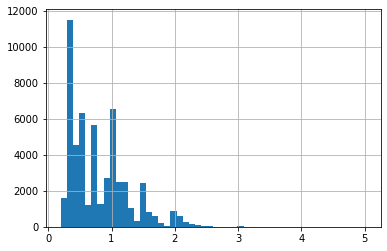

In [24]:
data['carat'].hist(bins=50)

This shows that the diamonds' carat is a positively skewed distribution. That means that most of the diamonds are light in weight.
#### Let's now do some descriptive statistics on the carat feature.

In [5]:
data['carat'].mean()

0.7979397478679852

In [6]:
data['carat'].median()

0.7

In [7]:
data['carat'].std()

0.47401124440538067

This shows us that the average weight of diamonds is 0.7979 carats, while the median is 0.7 carats. which confirms that the diamonds are positively skewed.

In [25]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
data.replace(['Fair', 'Very Good', 'Good', 'Premium', 'Ideal'],
             [0, 1, 2, 3, 4], inplace=True)
             

In [31]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [32]:
data.replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'],
             [0, 1, 2, 3, 4, 5, 6], inplace=True)


In [29]:
data['clarity'].unique()


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [30]:
data.replace(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
             [7, 6, 5, 4, 3, 2, 1, 0], inplace=True)
             

In [33]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,0,1,63.3,58.0,335,4.34,4.35,2.75


remove outliers 

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
cut,53940.0,2.771060,1.265976,0.0,1.00,3.00,4.00,4.00
color,53940.0,3.405803,1.701105,0.0,2.00,3.00,5.00,6.00
clarity,53940.0,3.051020,1.647136,0.0,2.00,3.00,4.00,7.00
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [37]:
from scipy import stats
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,51590.0,0.759933,0.424983,0.20,0.39,0.70,1.02,2.21
cut,51590.0,2.812231,1.238661,0.00,2.00,3.00,4.00,4.00
color,51590.0,3.433553,1.694698,0.00,2.00,3.00,5.00,6.00
clarity,51590.0,3.086994,1.642585,0.00,2.00,3.00,4.00,7.00
depth,51590.0,61.752838,1.269255,57.50,61.10,61.80,62.50,66.00
table,51590.0,57.369137,2.100018,51.00,56.00,57.00,59.00,64.00
price,51590.0,3586.031847,3436.874161,326.00,926.00,2303.50,5047.00,15898.00
x,51590.0,5.657855,1.057420,3.73,4.69,5.66,6.49,8.60
y,51590.0,5.661272,1.050383,3.68,4.70,5.66,6.49,8.55
z,51590.0,3.494649,0.653051,1.53,2.89,3.49,4.01,5.30


In [34]:
data.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [39]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [40]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.111313,-0.276477,-0.346967,0.026977,0.187219,0.922409,0.982155,0.981280,0.981179
cut,-0.111313,1.000000,0.011467,0.142104,-0.178398,-0.368870,-0.053805,-0.099095,-0.104721,-0.122005
color,-0.276477,0.011467,1.000000,-0.038924,-0.045560,-0.023255,-0.155349,-0.254146,-0.254170,-0.258068
clarity,-0.346967,0.142104,-0.038924,1.000000,-0.057689,-0.161825,-0.133372,-0.365985,-0.360834,-0.368048
depth,0.026977,-0.178398,-0.045560,-0.057689,1.000000,-0.279868,-0.001898,-0.022916,-0.025336,0.090190
table,0.187219,-0.368870,-0.023255,-0.161825,-0.279868,1.000000,0.131684,0.194327,0.189223,0.160202
price,0.922409,-0.053805,-0.155349,-0.133372,-0.001898,0.131684,1.000000,0.890454,0.891719,0.887340
x,0.982155,-0.099095,-0.254146,-0.365985,-0.022916,0.194327,0.890454,1.000000,0.998634,0.992605
y,0.981280,-0.104721,-0.254170,-0.360834,-0.025336,0.189223,0.891719,0.998634,1.000000,0.992309
z,0.981179,-0.122005,-0.258068,-0.368048,0.090190,0.160202,0.887340,0.992605,0.992309,1.000000


In [16]:
data.dtypes

carat      float64
cut          int64
color       object
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

#### Performing data cleaning


Getting a look of the number of null values in the dataset. We will use isnull().sum() for that as it will count the number of null values in each column. 

In [17]:
data.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Getting general information about the dataset

In [18]:
data.describe()

,carat,cut,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.771060,6.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.265976,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,3.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,5.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,6.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,7.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,10.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Calculating the correlation matrix of the dataset using `pandas.DataFrame.corr()` function

In [19]:
correlation_matrix = data.corr()
correlation_matrix

,carat,cut,clarity,depth,table,price,x,y,z
carat,1.000000,-0.114426,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.114426,1.000000,0.152860,-0.169916,-0.381988,-0.049421,-0.105361,-0.105319,-0.126726
clarity,-0.352841,0.152860,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.169916,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.381988,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.049421,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.105361,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.105319,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.126726,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [20]:
[column for column in data.columns]


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

<AxesSubplot:>

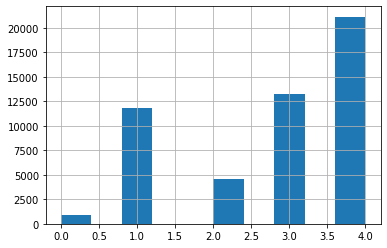

In [43]:
data['cut'].hist()


In [44]:
import matplotlib.pyplot as plt  # matplot library
import seaborn as sns  # seaborn library
%matplotlib inline


In [23]:
#See the correlation between features and our target => Price
income_correlation = data.corr()['price']
income_correlation


carat      0.921591
cut       -0.049421
clarity   -0.146800
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64

In [24]:
#Use Groupby and Mean to understand the relation Between room_type and price
data[['cut','price']].groupby(['cut'],as_index=False).mean().sort_values(by='price',ascending=False)

,cut,price
3,4,4584.257704
0,1,4358.757764
1,2,3981.759891
2,3,3928.864452
4,5,3457.541970


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


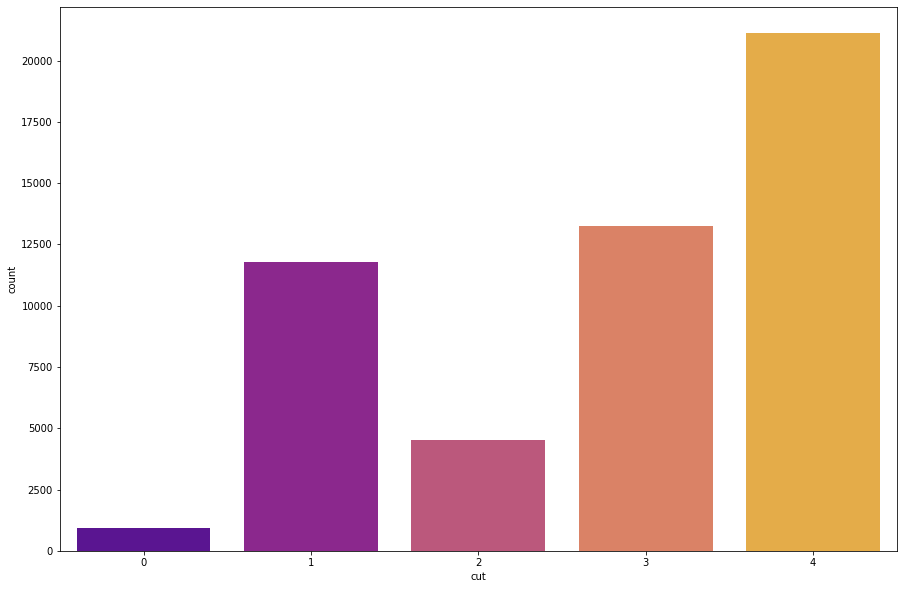

In [45]:
#Seaborn count plot for income. 
plt.figure(figsize=(15, 10))
sns.countplot(data['cut'], palette="plasma")
plt.show()


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


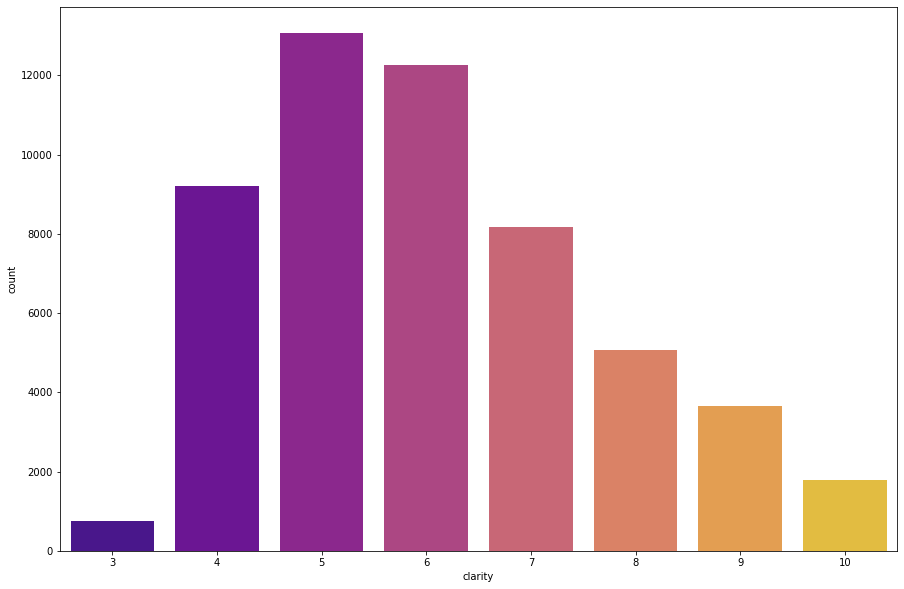

In [26]:
#Seaborn count plot for income.
plt.figure(figsize=(15, 10))
sns.countplot(data['clarity'], palette="plasma")
plt.show()


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


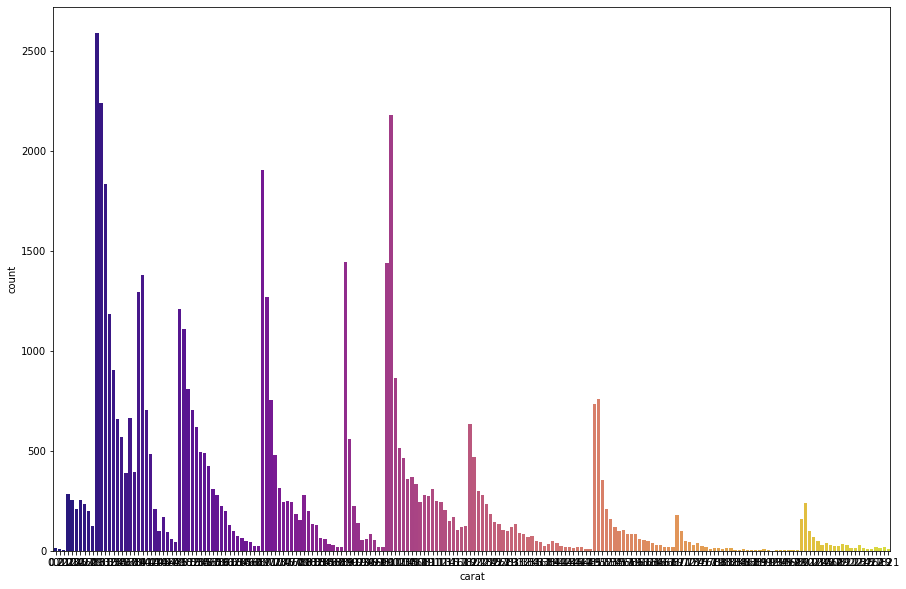

In [46]:
#Seaborn count plot for income.
plt.figure(figsize=(15, 10))
sns.countplot(data['carat'], palette="plasma")
plt.show()


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

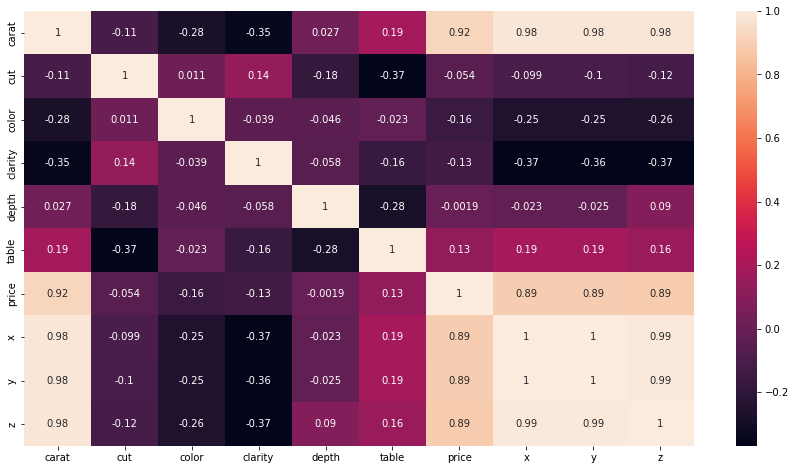

In [47]:
#Seaborn heatmap for the correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
data.columns


In [28]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,7,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,4,63.3,58.0,335,4.34,4.35,2.75


In [29]:
data.corr()['price']


carat      0.921591
cut       -0.049421
clarity   -0.146800
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
cut,53940.0,3.771060,1.265976,1.0,2.00,4.00,5.00,5.00
clarity,53940.0,6.051020,1.647136,3.0,5.00,6.00,7.00,10.00
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


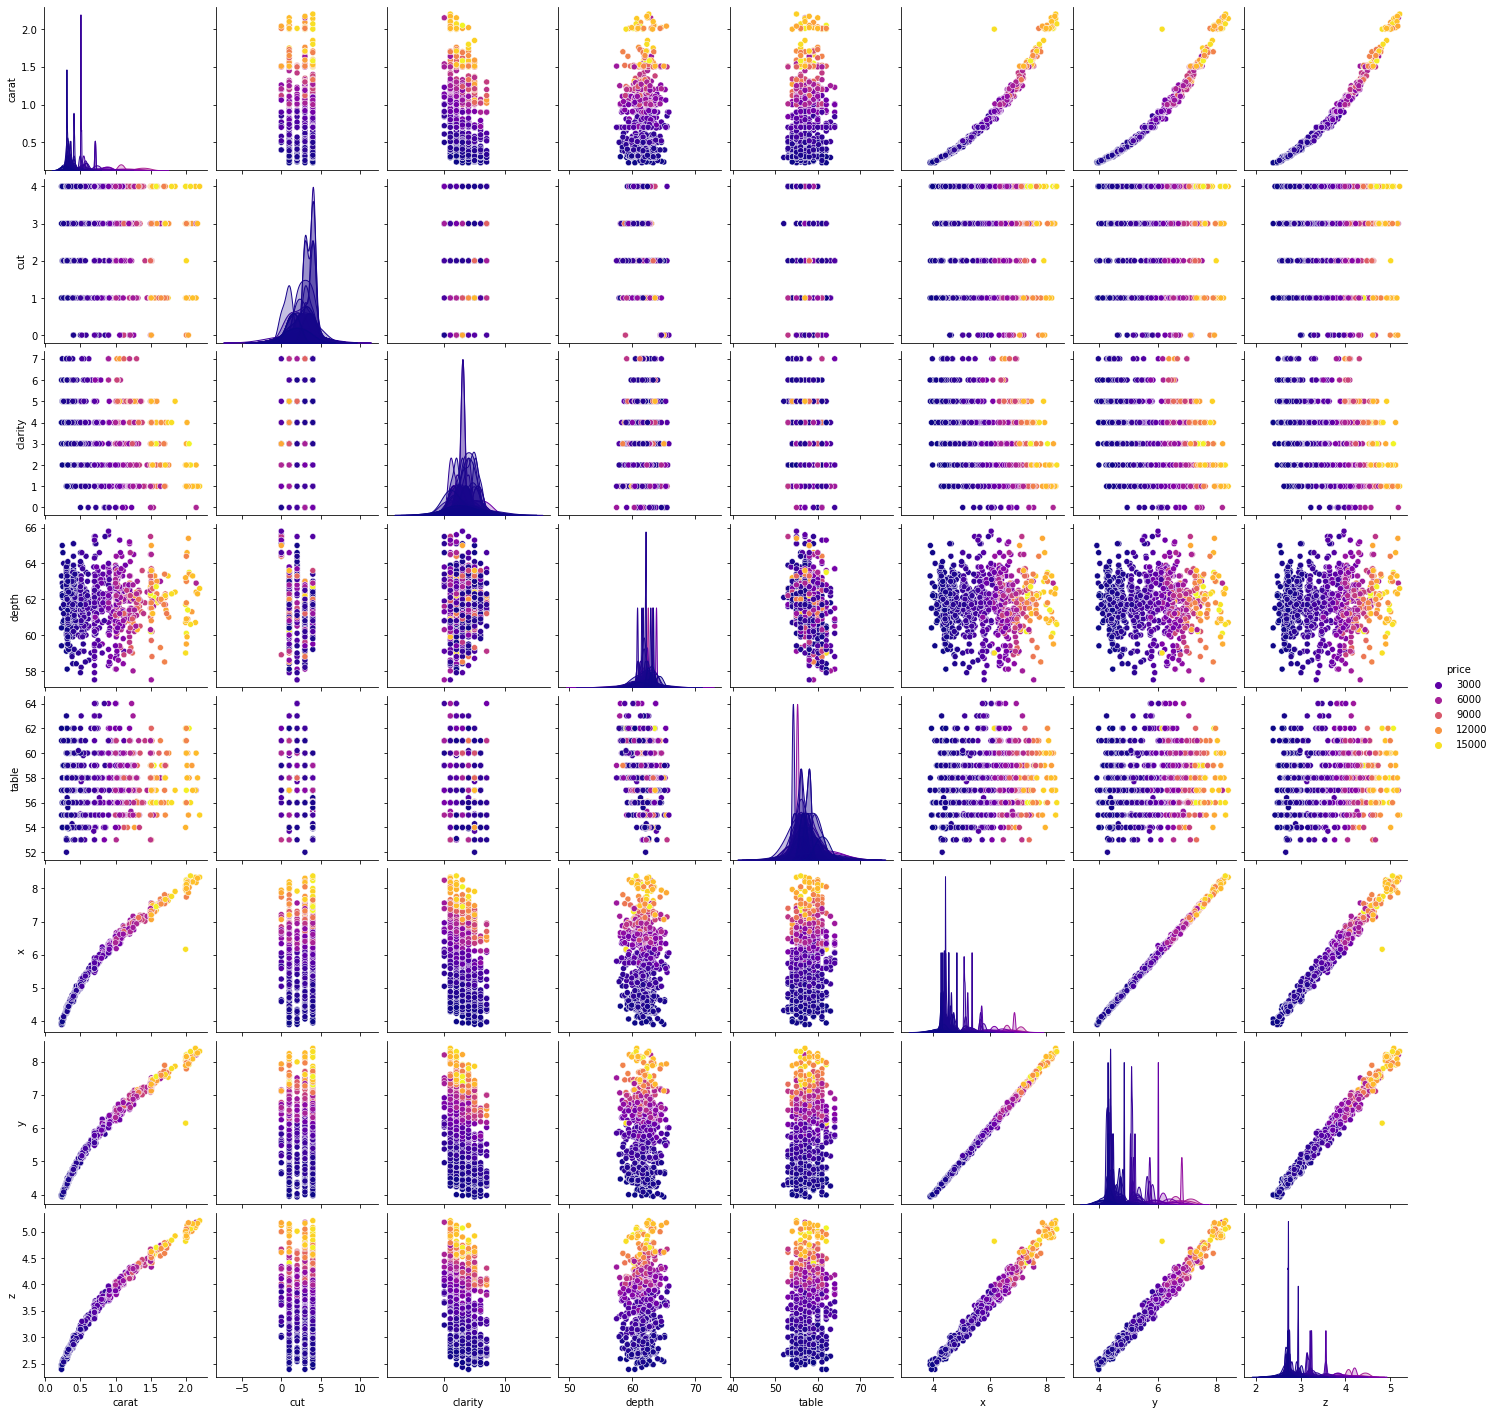

In [52]:
#Seaborn pairplot for correlation of features and Price
# sns.pairplot(data[100:1100].drop(['color'], axis=1),hue='price',palette='plasma')
sns.pairplot(data.sample(n=1000).drop(['color'], axis=1),hue='price',palette='plasma')

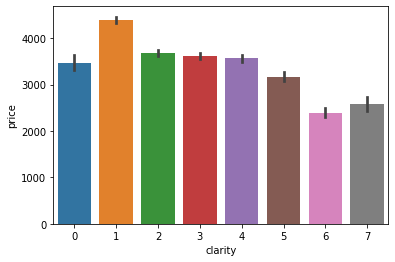

In [53]:
#Seaborn barplot for room_type and price
sns.barplot(x='clarity', y='price', data=data)
plt.show()


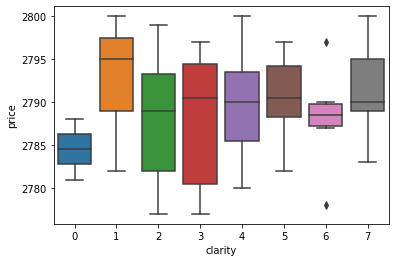

In [54]:
#Seaborn Boxplot for country and life expectancy
sns.boxplot(x='clarity', y='price', data=data[200:300])
plt.show()

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='depth'>

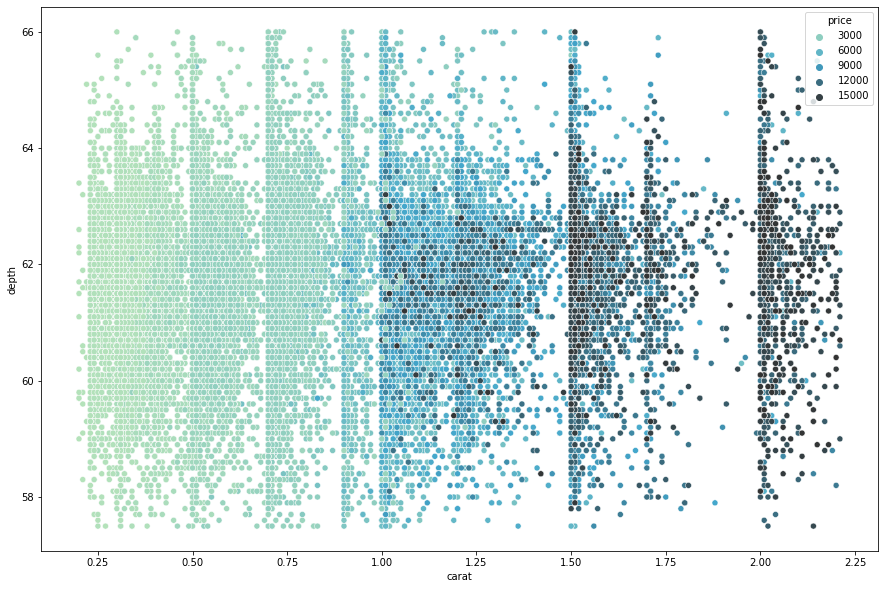

In [60]:
#Seaborn Scatter plot for Schooling and Income composition of resources with respect to Life expectancy
plt.figure(figsize=(15,10))
# plt.xlim([0, 3])
# plt.ylim([55, 70])
sns.scatterplot(data['carat'],data['depth'],hue=data['price'],palette='GnBu_d')

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

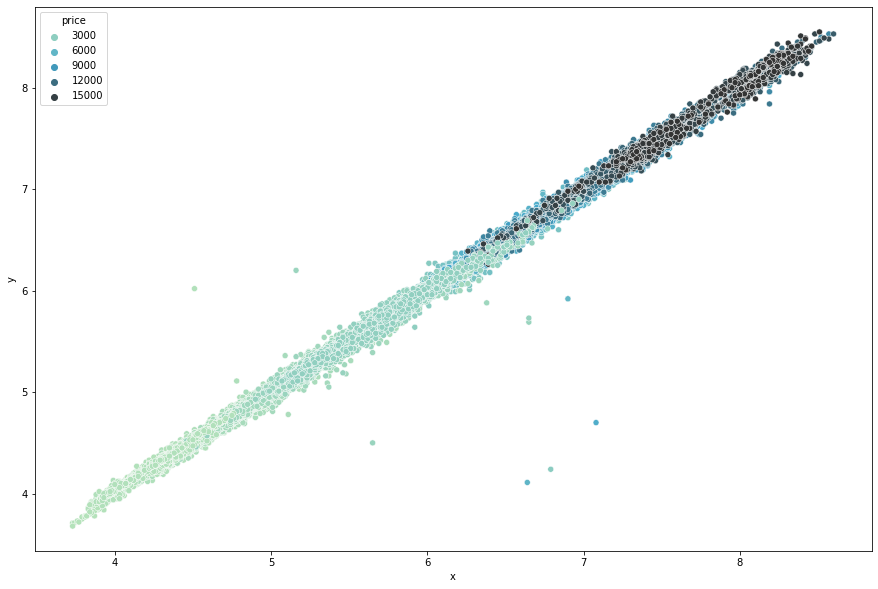

In [62]:
#Seaborn Scatter plot for Schooling and Income composition of resources with respect to Life expectancy
plt.figure(figsize=(15,10))
sns.scatterplot(data['x'],data['y'],hue=data['price'],palette='GnBu_d')

<AxesSubplot:xlabel='color', ylabel='Count'>

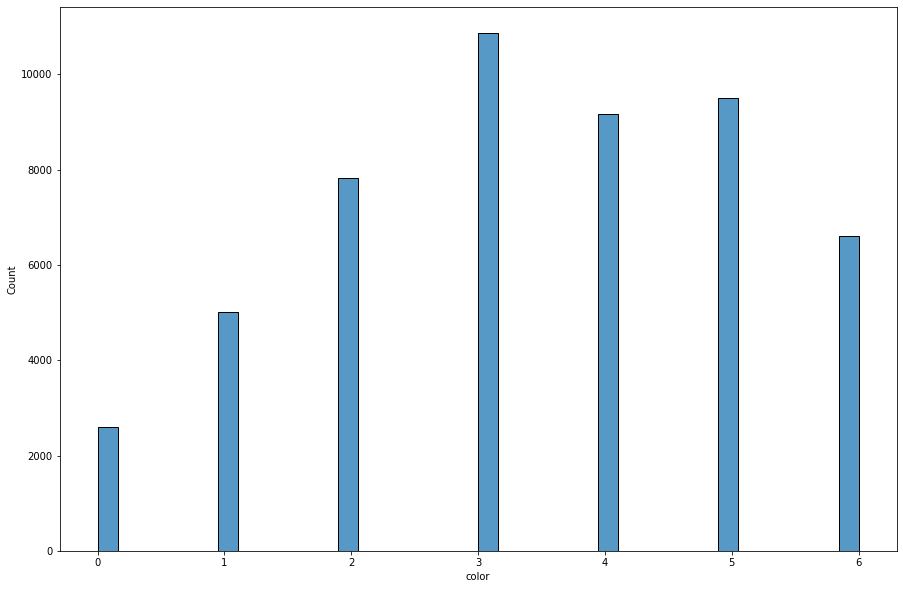

In [64]:
plt.figure(figsize=(15, 10))
sns.histplot(data['color'],palette='GnBu_d')

<AxesSubplot:xlabel='price', ylabel='Count'>

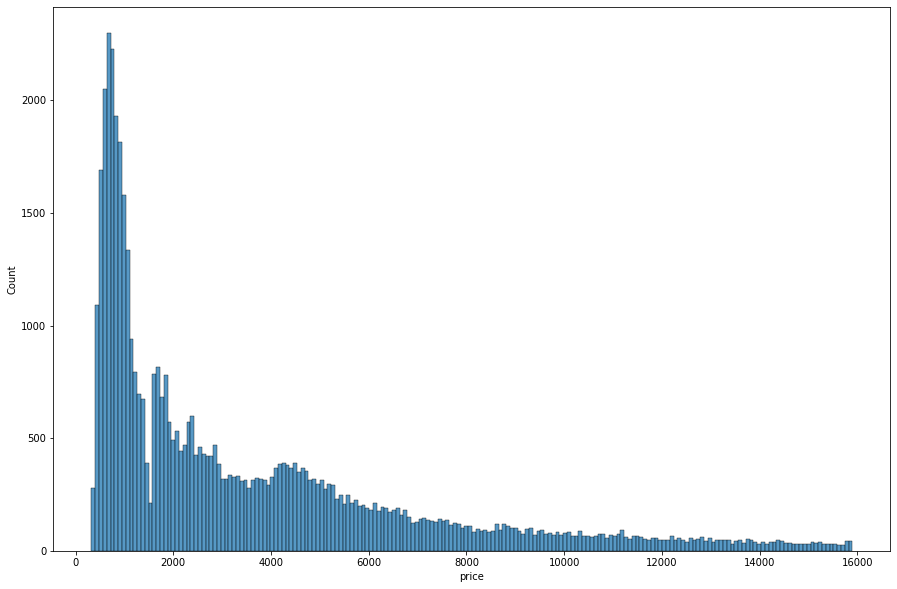

In [65]:
plt.figure(figsize=(15, 10))
sns.histplot(data['price'],palette='GnBu_d', bins=200)

<AxesSubplot:xlabel='color', ylabel='price'>

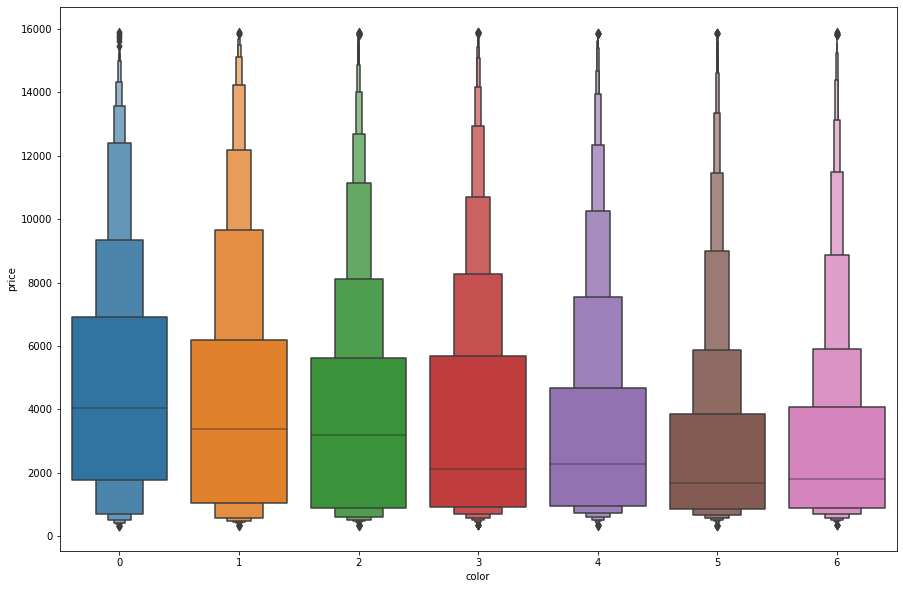

In [66]:
plt.figure(figsize=(15, 10))
sns.boxenplot(x=data['color'], y=data['price'],
              data=data)


<AxesSubplot:xlabel='carat', ylabel='price'>

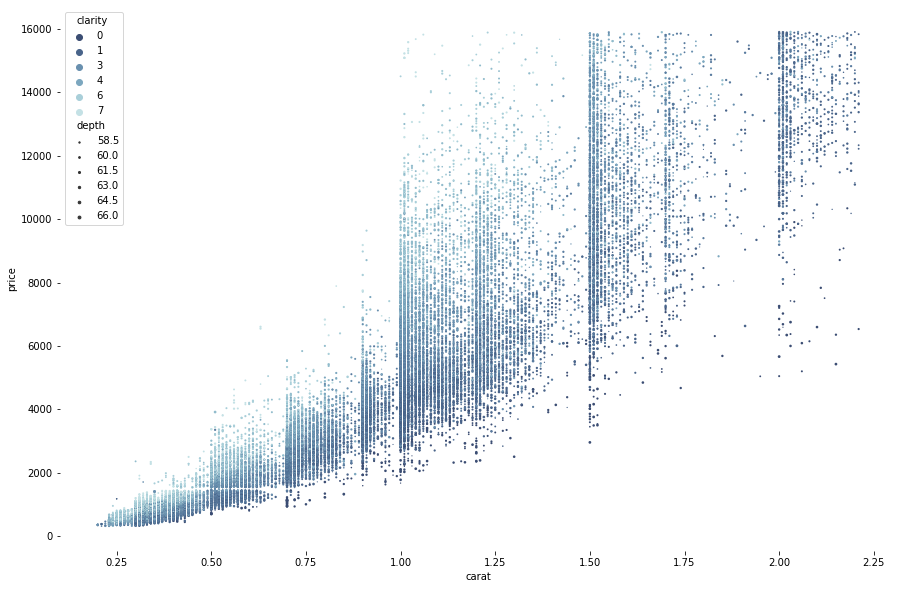

In [67]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
# d = data[data['carat'] <= 4]
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)


<Figure size 1080x720 with 0 Axes>

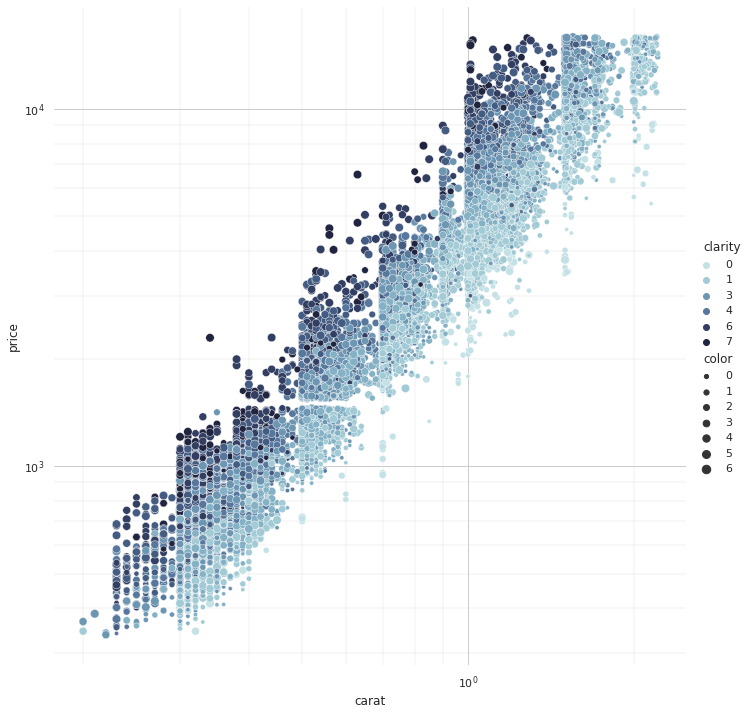

In [68]:
d = data.sample(n=15000)

plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=d,
    x="carat", y="price",
    hue="clarity", size="color",
    palette=cmap, height=10
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)


In [ ]:
data.dtypes

carat      float64
cut          int64
color       object
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

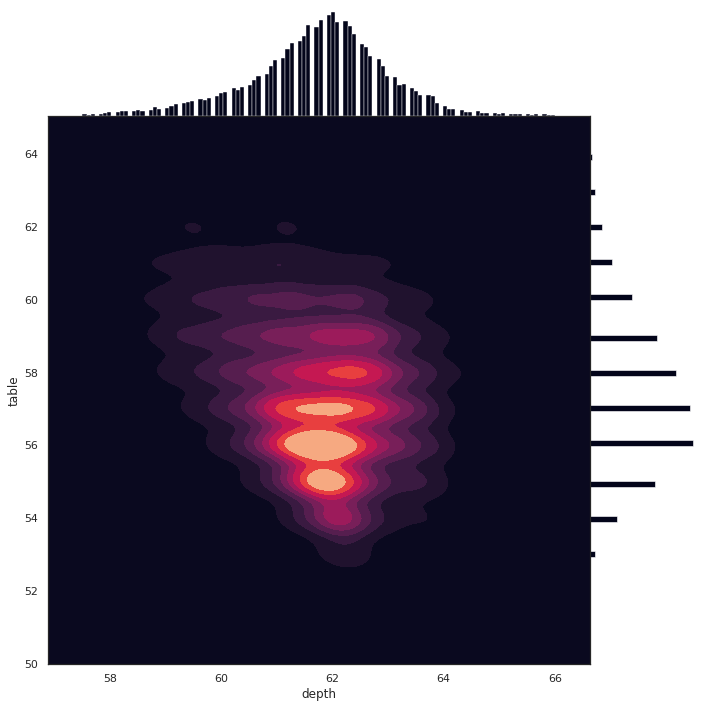

In [69]:
sns.set_theme(style="white")

g = sns.JointGrid(data=data, x="depth", y="table", space=0, height=10)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1)


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
cut,53940.0,3.771060,1.265976,1.0,2.00,4.00,5.00,5.00
clarity,53940.0,6.051020,1.647136,3.0,5.00,6.00,7.00,10.00
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


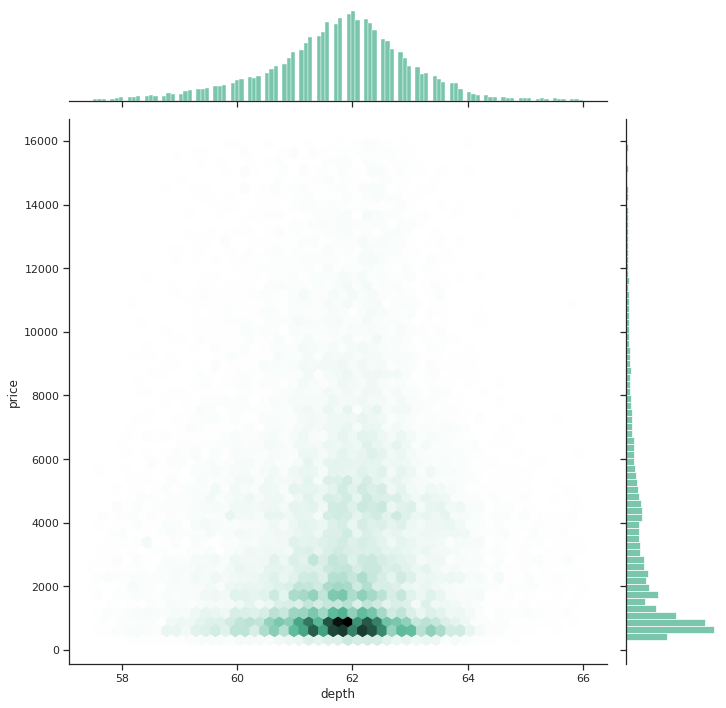

In [70]:
sns.set_theme(style="ticks")

sns.jointplot(x=data['depth'], y=data['price'],
              kind="hex", color="#4CB391", height=10)
# sns.jointplot(x=d['carat'], y=d['price'],
#               kind="hex", color="#4CB391", height=10)


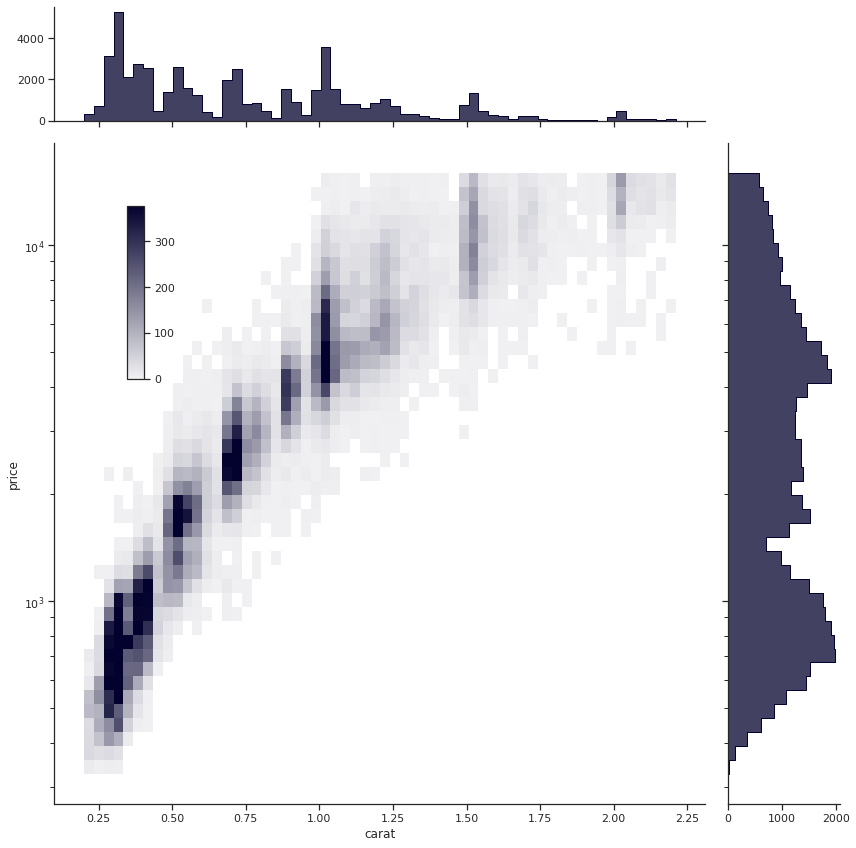

In [71]:
sns.set_theme(style="ticks")

g = sns.JointGrid(data=data, x="carat", y="price", marginal_ticks=True, height=12)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(False, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax,
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")


In [ ]:
data['clarity'].unique()

array([ 4,  5,  7,  6,  8,  9,  3, 10])

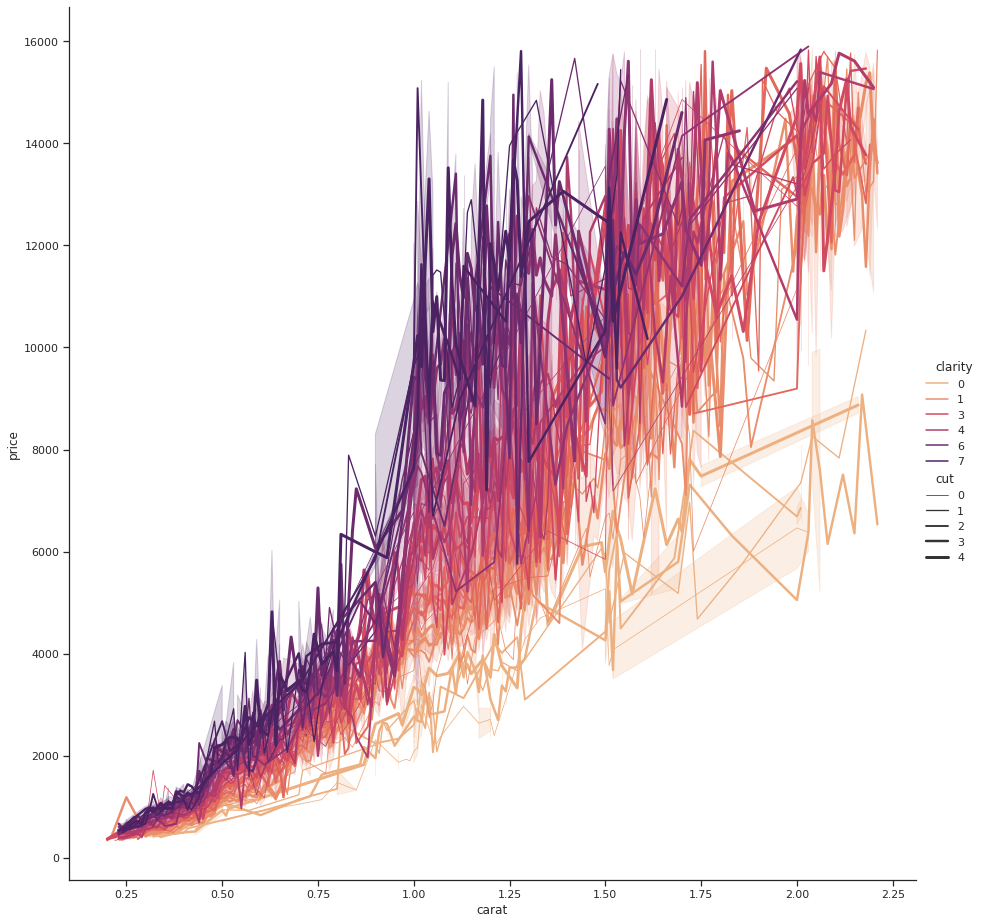

In [72]:
d = data.sample(30000)
sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("flare", as_cmap=True)

# Plot the lines on two facets
sns.relplot(
    data=d,
    x="carat", y="price",
    hue="clarity", size="cut",
    kind="line", palette=palette,
    height=13, facet_kws=dict(sharex=False),
)


In [ ]:
[column for column in data.columns]

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
data.dtypes

carat      float64
cut          int64
color       object
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
data['infant_deaths'].unique()


array([  62,   64,   66,   69,   71,   74,   77,   80,   82,   84,   85,
         87,   88,    0,    1,   21,   20,   19,   67,   72,   75,   78,
         81,   90,   92,   94,   95,   96,   97,    8,    9,   10,   11,
         12,    5,    6,    7,   98,  104,  111,  118,  126,  135,  144,
        154,  164,  174,  185,  196,  207,  219,  231,   25,   13,   14,
         15,    2,   42,   44,   46,   49,   51,   54,   57,   61,   65,
         70,  103,   38,   39,   40,   41,   43,   45,   47,   48,   22,
         23,   24,   58,   59,   60,   63,   16,   17,   18,   27,   50,
         53,   56,  157,  171,  201,  215,  248,  266,  285,  307,  332,
        360,  391,  422,  457,  490,  236,  237,  238,  239,  235,  233,
        232,  229,  227,  226,   55,    3,    4,  136,  140,  145,  150,
        156,  162,  169,  177,  186,  206,  217,  228,  246,  253,   37,
         26,   28,   29,   30,   31,   32,   33,   34,   35,   36,  910,
        957, 1000, 1100, 1200, 1300, 1400, 1500, 16